# Ativaidade 02
- Definição de uma base de dados (diferente da Atividade 1 -- sugestão: UCR) para Regressão
- Analise os dados
- Trate os dados
- Escolha 1 modelo de Aprendizagem Profunda p/ séries temporais
- Defina as métricas de avaliação
- Treine, teste e apresente os resultados

**OBS: sugestão do uso do TSAI**

> Aluno: Marlos Ribeiro [mgrb]

## Prepanado o ambiente

### Instalando as bibliotecas necessárias

In [1]:
%%bash

if command -v uv &> /dev/null
then
    uv add tsai
else
    pip install tsai
fi

Resolved 132 packages in 0.49ms
Audited 126 packages in 0.03ms


### Download e verificação do dataset

In [2]:
# Imporatndo dados
import os
import pandas as pd

data_dir = os.getcwd()
data_url = "https://www.kaggle.com/api/v1/datasets/download/vivekattri/california-wildfire-damage-2014-feb2025"

data_pkg = "data.zip"

# Coamndo curl para baixar o arquivo
!curl -L -o "{data_dir}"/"{data_pkg}" "{data_url}"

# Descompactando arquivo
!unzip -o "{data_dir}"/"{data_pkg}" -d "{data_dir}"/data

# Delentando arquivo zip
!rm "{data_dir}"/"{data_pkg}"

# Carregando dados
data_path = os.path.join(data_dir, "data", "California Wildfire Damage.csv")
data = pd.read_csv(data_path)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  3036  100  3036    0     0   3983      0 --:--:-- --:--:-- --:--:-- 26631
Archive:  /home/mgrb/Workspaces/CESAR.School/series_temporais/notebooks/atividades/data.zip
  inflating: /home/mgrb/Workspaces/CESAR.School/series_temporais/notebooks/atividades/data/California Wildfire Damage.csv  


In [3]:
data.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [5]:
# Realizar cast de tipos Object para seus respectivos tipos

data["Incident_ID"] = data["Incident_ID"].astype(str)
data["Date"] = pd.to_datetime(data["Date"])
data["Location"] = data["Location"].astype(str)
data["Cause"] = data["Cause"].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Incident_ID                           100 non-null    object        
 1   Date                                  100 non-null    datetime64[ns]
 2   Location                              100 non-null    object        
 3   Area_Burned (Acres)                   100 non-null    int64         
 4   Homes_Destroyed                       100 non-null    int64         
 5   Businesses_Destroyed                  100 non-null    int64         
 6   Vehicles_Damaged                      100 non-null    int64         
 7   Injuries                              100 non-null    int64         
 8   Fatalities                            100 non-null    int64         
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64       
 10  Cau

In [6]:
# Renomer colunas no formato snake_case
data.columns = data.columns.str.lower().str.replace(" ", "_")

# Renomear colunas
# area_burned_(acres) -> area_burned
# estimated_financial_loss_(million_$) -> estimated_financial_loss
columns = {
    "area_burned_(acres)": "area_burned", 
    "estimated_financial_loss_(million_$)": "estimated_financial_loss"
    }

data.rename(columns=columns, inplace=True)

# ordenar dataframe pela coluna date
data.sort_values("date", inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 58 to 8
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   incident_id               100 non-null    object        
 1   date                      100 non-null    datetime64[ns]
 2   location                  100 non-null    object        
 3   area_burned               100 non-null    int64         
 4   homes_destroyed           100 non-null    int64         
 5   businesses_destroyed      100 non-null    int64         
 6   vehicles_damaged          100 non-null    int64         
 7   injuries                  100 non-null    int64         
 8   fatalities                100 non-null    int64         
 9   estimated_financial_loss  100 non-null    float64       
 10  cause                     100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 9.4+ KB


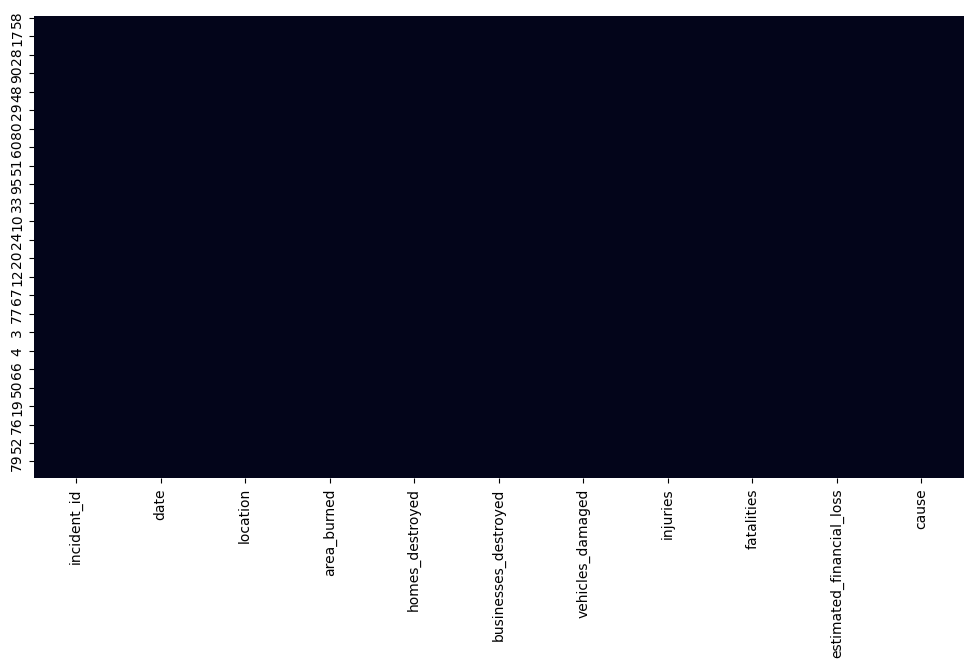

In [7]:
# Plotar um heatmap para analisar dados faltantes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False)
plt.show()


In [10]:
# Criar um dataframe somente com colunas numéricas para analisar a correlação entre elas
data_numeric = data.select_dtypes(include="number")
print("Colunas numéricas:")
print(data_numeric.columns)
data_numeric.head()

Colunas numéricas:
Index(['area_burned', 'homes_destroyed', 'businesses_destroyed',
       'vehicles_damaged', 'injuries', 'fatalities',
       'estimated_financial_loss'],
      dtype='object')


,area_burned,homes_destroyed,businesses_destroyed,vehicles_damaged,injuries,fatalities,estimated_financial_loss
58,47674,1186,438,71,54,11,2580.87
74,9737,1735,386,52,44,10,4075.67
38,41647,484,210,180,7,16,286.64
61,11162,544,223,196,100,8,85.57
17,25094,1014,288,269,30,12,268.91


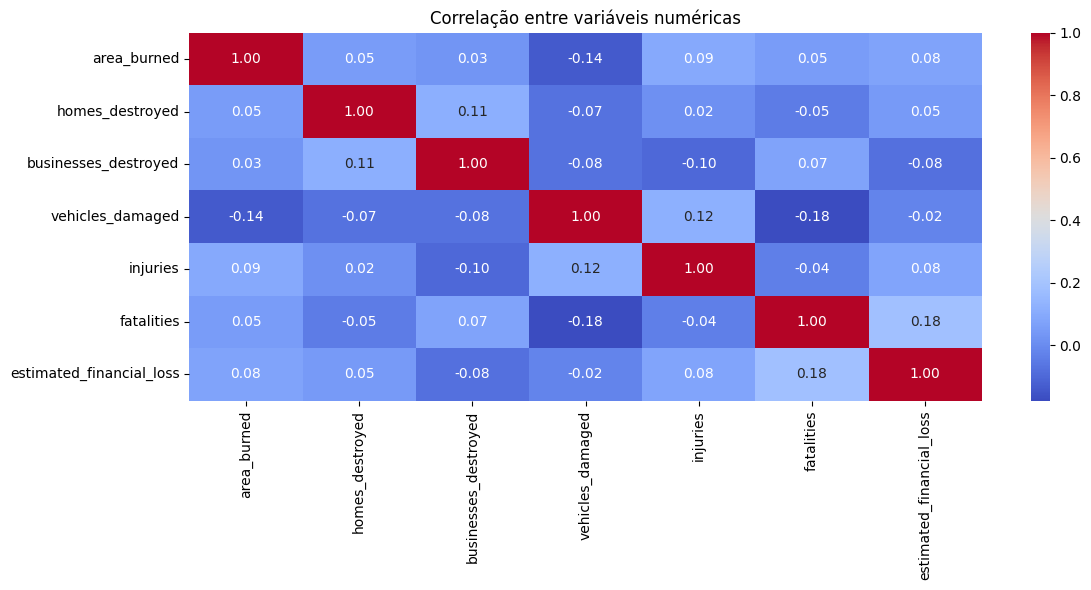

In [11]:
# Mapa de correlação
plt.figure(figsize=(12, 6))
sns.heatmap(data_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()


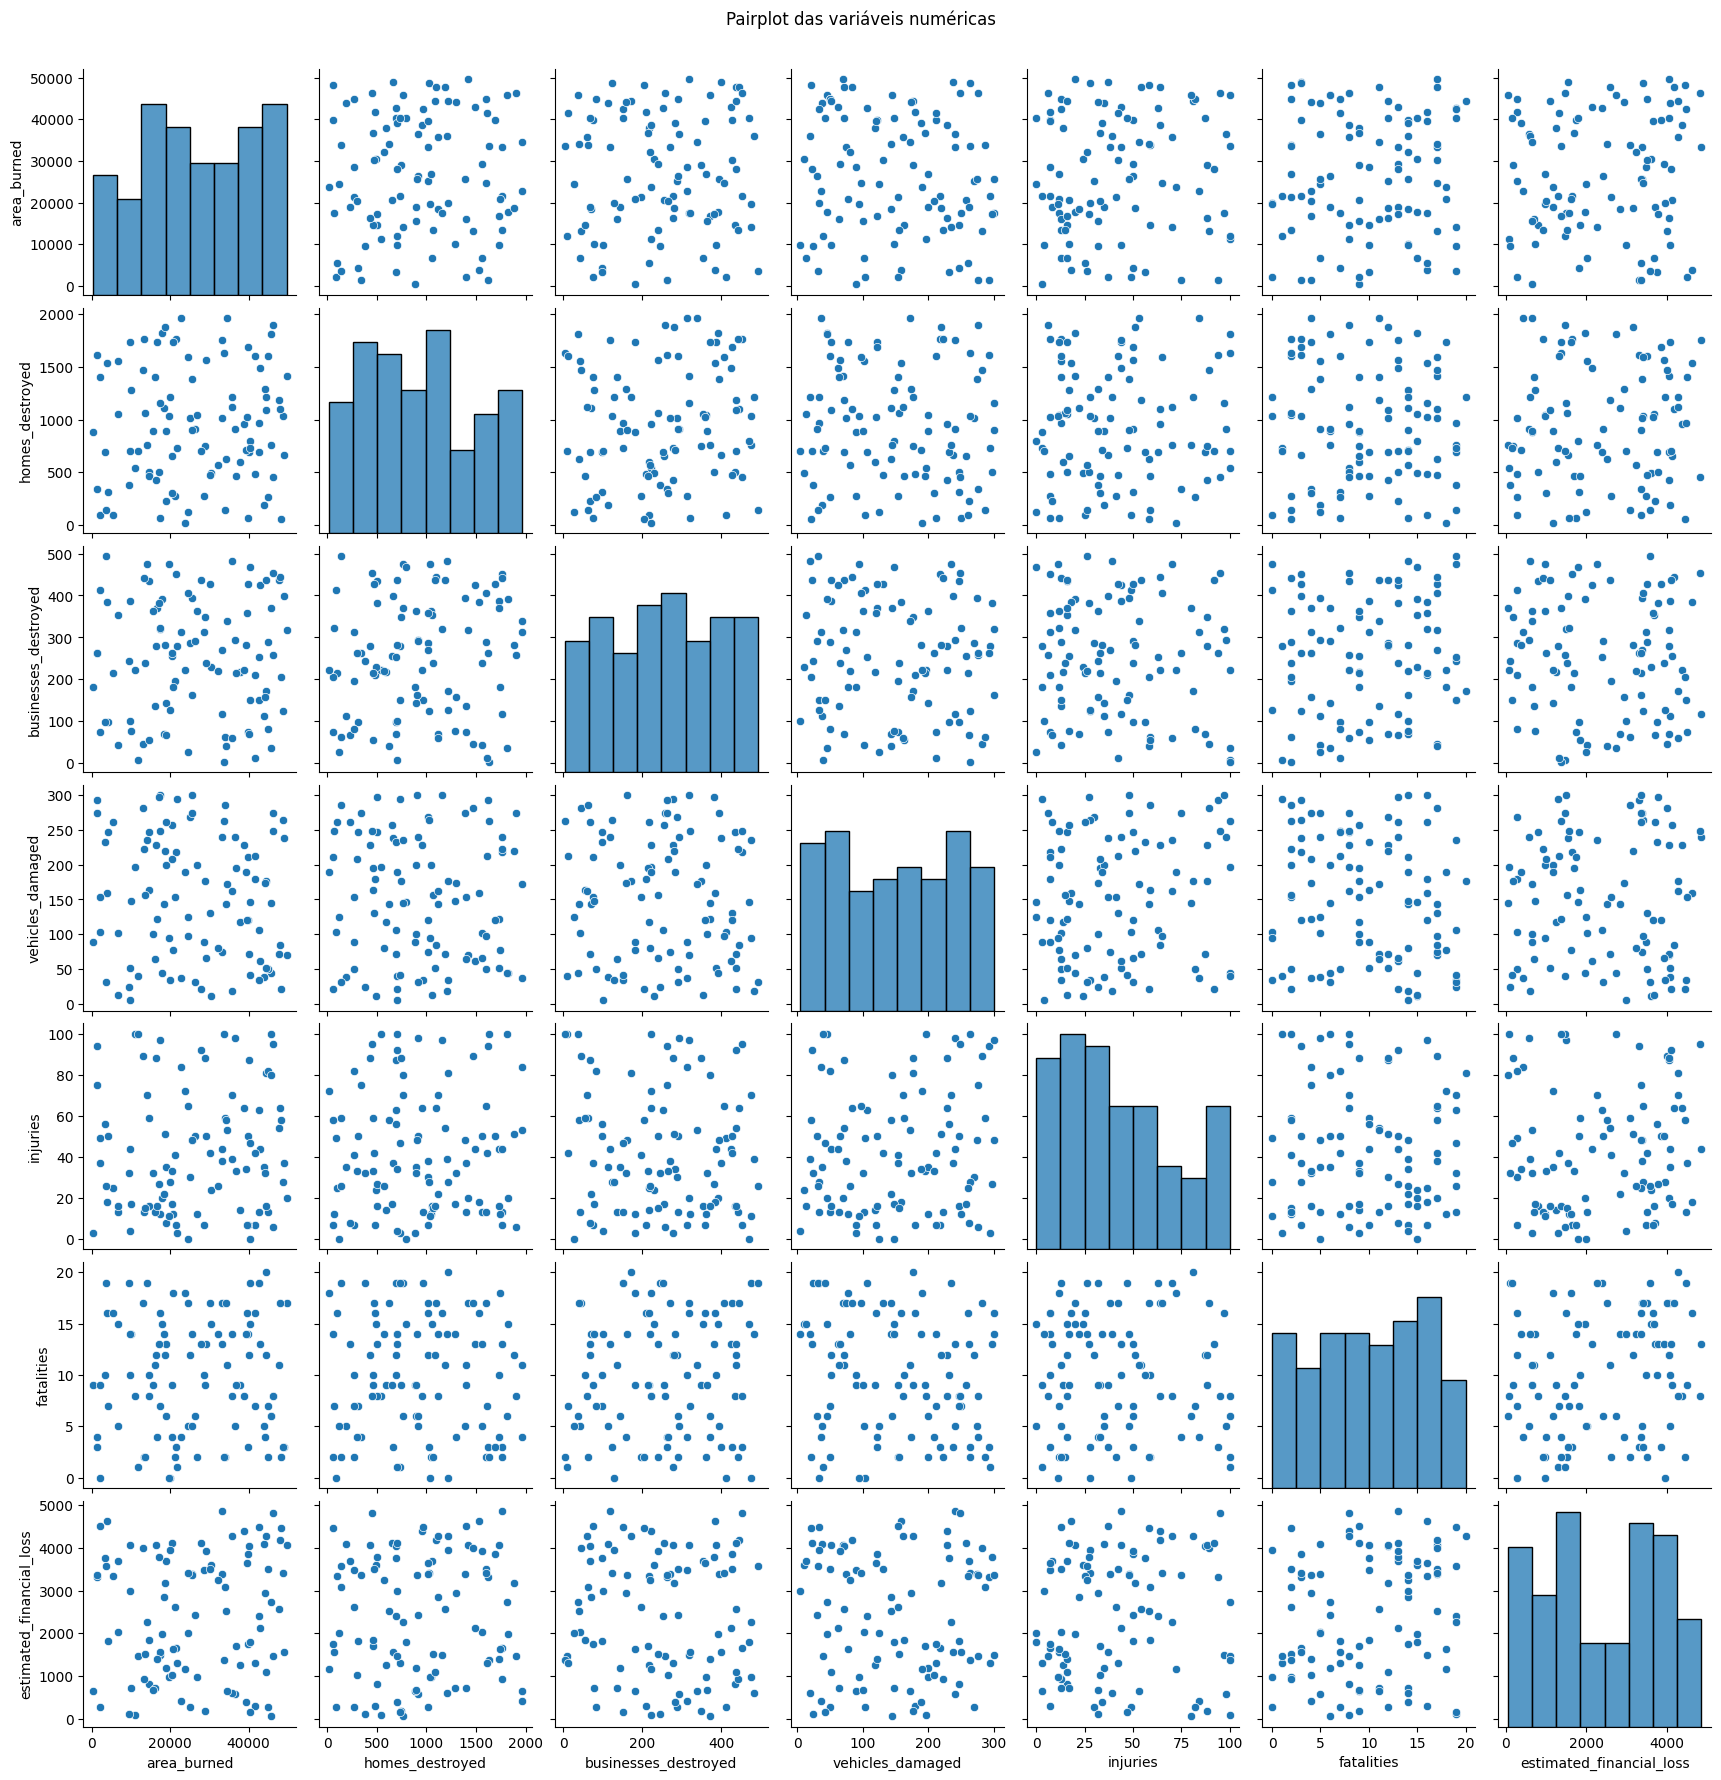

In [14]:
# Plotar um pairplot para analisar a distribuição das variáveis numéricas
sns.pairplot(data_numeric)
plt.suptitle("Pairplot das variáveis numéricas", y=1.02)
plt.show()

## Preparando para Modelos
Serão usados as seguites features de maneira combinada para buscar prever o valor de perdas financeiras(estimated_financial_loss) de um incêndio florestal:

- Área queimada (area_burned)
- Negócios destruídos (businesses_destroyed)
- Veículos danificados (vehicles_damaged)
- Mechudados (injuries)
- instalações (fatalities)

In [34]:
features=["area_burned", "businesses_destroyed", "vehicles_damaged", "injuries", "fatalities"]
target=["estimated_financial_loss"]

# Criar um dataframe somente com as colunas selecionadas
data_selected = data[["date"] + features + target]

# setar date como index do dataframe
data_selected.set_index("date", inplace=True)

data_selected.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2014-02-03 to 2023-12-08
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   area_burned               100 non-null    int64  
 1   businesses_destroyed      100 non-null    int64  
 2   vehicles_damaged          100 non-null    int64  
 3   injuries                  100 non-null    int64  
 4   fatalities                100 non-null    int64  
 5   estimated_financial_loss  100 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 5.5 KB


In [36]:
# Separando conjuntos de treino e teste
# from tsai.data import TrainValidTestSplitter
from tsai.all import *  # noqa: F403
from sklearn.preprocessing import MinMaxScaler

# Normalizando os dados
scaler = MinMaxScaler()
data_selected_scaled = pd.DataFrame(
    scaler.fit_transform(data_selected), 
    columns=data_selected.columns, 
    index=data_selected.index )

# Lags para padroes temporais
lags = 3 # numero de periodos anteriores
for col in features + target:
    for lag in range(1, lags + 1):
        data_selected_scaled[f"{col}_lag_{lag}"] = data_selected_scaled[col].shift(lag)

data_selected_scaled.dropna(inplace=True) # removendo linhas com valores faltantes

data_selected_scaled.info()
data_selected_scaled.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2014-03-28 to 2023-12-08
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area_burned                     97 non-null     float64
 1   businesses_destroyed            97 non-null     float64
 2   vehicles_damaged                97 non-null     float64
 3   injuries                        97 non-null     float64
 4   fatalities                      97 non-null     float64
 5   estimated_financial_loss        97 non-null     float64
 6   area_burned_lag_1               97 non-null     float64
 7   area_burned_lag_2               97 non-null     float64
 8   area_burned_lag_3               97 non-null     float64
 9   businesses_destroyed_lag_1      97 non-null     float64
 10  businesses_destroyed_lag_2      97 non-null     float64
 11  businesses_destroyed_lag_3      97 non-null     float64
 12  vehicles_damaged_l

,area_burned,businesses_destroyed,vehicles_damaged,injuries,fatalities,estimated_financial_loss,area_burned_lag_1,area_burned_lag_2,area_burned_lag_3,businesses_destroyed_lag_1,...,vehicles_damaged_lag_3,injuries_lag_1,injuries_lag_2,injuries_lag_3,fatalities_lag_1,fatalities_lag_2,fatalities_lag_3,estimated_financial_loss_lag_1,estimated_financial_loss_lag_2,estimated_financial_loss_lag_3
date,,,,,,,,,,,,,,,,,,,,,
2014-03-28,0.219186,0.447853,0.647458,1.00,0.40,0.006850,0.837593,0.190279,0.959855,0.421268,...,0.223729,0.07,0.44,0.54,0.80,0.50,0.55,0.048615,0.835635,0.525150
2014-04-16,0.501805,0.580777,0.894915,0.30,0.60,0.044932,0.219186,0.837593,0.190279,0.447853,...,0.159322,1.00,0.07,0.44,0.40,0.80,0.50,0.006850,0.048615,0.835635
2014-04-24,0.734279,0.591002,0.796610,0.98,0.25,0.106913,0.501805,0.219186,0.837593,0.580777,...,0.593220,0.30,1.00,0.07,0.60,0.40,0.80,0.044932,0.006850,0.048615
2014-05-13,0.433017,0.562372,0.979661,0.03,0.05,0.260209,0.734279,0.501805,0.219186,0.591002,...,0.647458,0.98,0.30,1.00,0.25,0.60,0.40,0.106913,0.044932,0.006850
2014-05-16,0.574164,0.631902,0.284746,0.07,0.50,0.712972,0.433017,0.734279,0.501805,0.562372,...,0.894915,0.03,0.98,0.30,0.05,0.25,0.60,0.260209,0.106913,0.044932


In [53]:
# Separando conjuntos de treino e teste

window_size = 6
X, y = SlidingWindow(window_size, horizon=1, stride=1)(data_selected_scaled[features + target].values)  # noqa: F405 :: SlidingWindow vem do TSAI
y = y[:, -1] 

split_ratio = 0.8
split_idx = int(split_ratio * len(data_selected_scaled))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# printar verificação dos conjuntos de treino e teste
print("Conjunto de treino")
print(f"X_train shape: {X_train.shape}") # Deve ser (N, seq_len, num_features)
print(f"y_train shape: {y_train.shape}") # Deve ser (N, 1) para regressão

print("\nConjunto de teste")
print(f"x_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


Conjunto de treino
X_train shape: (77, 6, 6)
y_train shape: (77,)

Conjunto de teste
x_test shape: (14, 6, 6)
y_test shape: (14,)


In [ ]:
# Dataloader
batch_size = 10
tfms = [None, TSRegression()]  # noqa: F405 :: TSRegression Vem do TSAI
dls = get_ts_dls(X_train, y_train, bs=batch_size, tfms=tfms, shuffle=False)# noqa: F405 :: get_ts_dls Vem do TSAI

print(f"dls.vars: {dls.vars}")  # Deve ser igual ao número de features
print(f"dls.c: {dls.c}")  # Deve ser 1 para previsão de uma única variável

# Modelo LSTM para prever as perdas fincanceiras
model = LSTM_FCN(dls.vars, dls.c, seq_len=X_train.shape[1])  # noqa: F405 :: LSTM_FCN Vem do TSAI
learn = Learner(dls, model, metrics=mae)  # noqa: F405 :: Learner e mae Vem do TSAI
learn.fit_one_cycle(50, lr_max=1e-3)  # Treinar o modelo

dls.vars: 6
dls.c: 1


epoch,train_loss,valid_loss,mae,time
0,0.132691,None,None,00:00
1,0.117762,None,None,00:00
2,0.098454,None,None,00:00
3,0.078939,None,None,00:00
4,0.062521,None,None,00:00
5,0.050873,None,None,00:00
6,0.041730,None,None,00:00
7,0.034675,None,None,00:00
8,0.028999,None,None,00:00
9,0.025004,None,None,00:00


In [ ]:
import numpy as np

# Realizando previsões
preds = learn.get_X_preds(X_test)[0]
preds_adjusted = np.hstack([preds, np.zeros((preds.shape[0], 5))])
preds_inverted = scaler.inverse_transform(preds_adjusted)[:, 0]  # Para pegar apenas a primeira coluna

preds_inverted

array([35626.11353874, 27058.90989304, 28387.11102962, 27453.63128471,
       25191.73590946, 27579.98573399, 26970.14180088, 18612.63518   ,
       33420.82688427, 21991.75064278, 30769.83102894, 26608.32022476,
       32968.00119209, 31053.23310184])

(14,)
(14, 6)


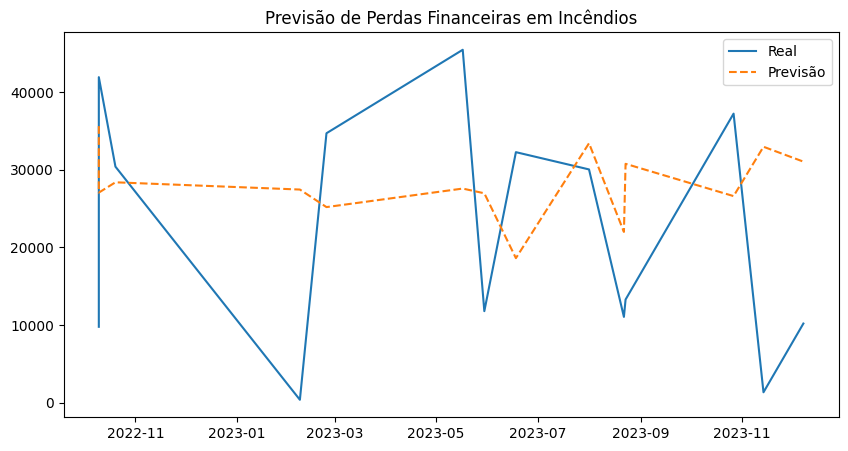

In [88]:
print(y_test.shape)
# acrescentar dimensão extra para y_test com zeros
y_test_adjusted = np.hstack([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 5))])
print(y_test_adjusted.shape)

# 8. Visualizar resultados
plt.figure(figsize=(10, 5))
data_to_plot = data_selected_scaled.index[-len(y_test_adjusted):]
plt.plot(data_to_plot, scaler.inverse_transform(y_test_adjusted)[:, 0], label="Real")
plt.plot(data_to_plot, preds_inverted, label="Previsão", linestyle="dashed")
plt.legend()
plt.title("Previsão de Perdas Financeiras em Incêndios")
plt.show()